In this dataset it will be to improve the V1


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, classification_report,precision_score
from sklearn.model_selection import GridSearchCV

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

In [3]:
data = pd.read_csv('data\Tumeurs.csv')

In [29]:
y = data['label'].copy()
X = data.drop('label', axis=1).copy()
columns_X = X.columns

In [30]:
X = X/255

### Reduce to have the same size in dataset (Class 0, 2, 6 )

Before we have to compute to have the same size : 

In [31]:
data_to_reduce4 = data[data['label']== 4]

data_to_reduce4 = data_to_reduce4.sample(frac=0.015, replace=True, random_state=0)


data_to_reduce6 = data[data['label']== 6]
data_to_reduce6 = data_to_reduce6.sample(frac=0.091, replace=True, random_state=0)

data_to_reduce2 = data[data['label']== 2]
data_to_reduce2 = data_to_reduce2.sample(frac=0.091, replace=True, random_state=0)

data_to_reduce1 = data[data['label']== 1]
data_to_reduce1 = data_to_reduce1.sample(frac=0.2, replace=True, random_state=0)

data_to_reduce0 = data[data['label']== 0]
data_to_reduce0 = data_to_reduce0.sample(frac=0.33, replace=True, random_state=0)

data_to_reduce5 = data[data['label']== 5]
data_to_reduce3 = data[data['label']== 3]

data_stabled = pd.concat((data_to_reduce4, data_to_reduce6, data_to_reduce2, data_to_reduce1, data_to_reduce0, data_to_reduce5,data_to_reduce3))

In [32]:
y = data_stabled['label'].copy()
X = data_stabled.drop('label', axis=1).copy()
y.value_counts()


5    142
3    115
0    108
1    103
4    101
6    101
2    100
Name: label, dtype: int64

In [34]:
columns_X = X.columns

The data is stable. Let's create our NN 

In [35]:

X = np.array(X)
X = X.reshape(len(data_stabled) ,28,28,1)

#X = X.reshape(len(data_stabled),784)

#Scaled
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1)


In [36]:
y.value_counts()

5    142
3    115
0    108
1    103
4    101
6    101
2    100
Name: label, dtype: int64

Callback 

In [37]:
early = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [42]:
model =tf.keras.models.Sequential([
    #tf.keras.layers.GaussianBlur(sigma=(0, 3.0)),
    tf.keras.layers.Conv2D(64,(3,3),activation = "relu" , input_shape = (28, 28, 1)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Conv2D(64,(3,3),activation = "relu") , 
    #tf.keras.layers.Conv2D(64,(3,3),activation = "relu") ,  
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128,(3,3),activation = "relu") ,  
    #tf.keras.layers.Conv2D(128,(3,3),activation = "relu") ,  
    tf.keras.layers.MaxPooling2D(2,2),
    #
    # tf.keras.layers.BatchNormalization(),
  
    
    #tf.keras.layers.Conv2D(256,(3,3),activation = "relu") , 
    #tf.keras.layers.Conv2D(256,(3,3),activation = "relu") , 
    #tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(rate = 0.15), #Important parameter
    # tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.GlobalAveragePooling2D(),
    
    #tf.keras.layers.Dense(units = 256, activation = 'relu'), 
    #tf.keras.layers.BatchNormalization(),
    
    #tf.keras.layers.Dense(units = 128, activation = 'relu'), 
    #tf.keras.layers.BatchNormalization(),
    
    #tf.keras.layers.Dense(units = 64, activation = 'relu'), 
    #tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Flatten(), #Convert 3d in 1d features vectors 
    #tf.keras.layers.Dense(64, activation='relu'),  
    tf.keras.layers.Dropout(0.5), 
    tf.keras.layers.Dense(7,activation = "softmax")])

In [43]:
#model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100,callbacks = [early], validation_data=(X_val, y_val))
#history = model.fit(X_train, y_train, epochs=100,callbacks = [early])

Epoch 1/100


c:\Users\mathi\anaconda3\lib\site-packages\tensorflow\python\keras\backend.py:4929: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


16/16 [==============================] - 1s 21ms/step - loss: 2.5388 - accuracy: 0.2041 - val_loss: 16.0210 - val_accuracy: 0.0926
Epoch 2/100
16/16 [==============================] - 0s 14ms/step - loss: 1.8761 - accuracy: 0.2392 - val_loss: 7.7416 - val_accuracy: 0.1667
Epoch 3/100
16/16 [==============================] - 0s 14ms/step - loss: 1.7538 - accuracy: 0.2722 - val_loss: 5.1355 - val_accuracy: 0.1481
Epoch 4/100
16/16 [==============================] - 0s 16ms/step - loss: 1.7151 - accuracy: 0.3031 - val_loss: 4.3199 - val_accuracy: 0.0926
Epoch 5/100
16/16 [==============================] - 0s 16ms/step - loss: 1.6756 - accuracy: 0.2887 - val_loss: 3.5475 - val_accuracy: 0.1852
Epoch 6/100
16/16 [==============================] - 0s 15ms/step - loss: 1.6056 - accuracy: 0.3423 - val_loss: 2.9780 - val_accuracy: 0.1481
Epoch 7/100
16/16 [==============================] - 0s 16ms/step - loss: 1.6559 - accuracy: 0.3155 - val_loss: 2.0352 - val_accuracy: 0.1667
Epoch 8/100
16/16

In [44]:
model_acc = model.evaluate(X_test, y_test)[1]

print("Test Accuracy: {:.3f}%".format(model_acc * 100))

8/8 [==============================] - 0s 4ms/step - loss: 1.7135 - accuracy: 0.3550
Test Accuracy: 35.498%


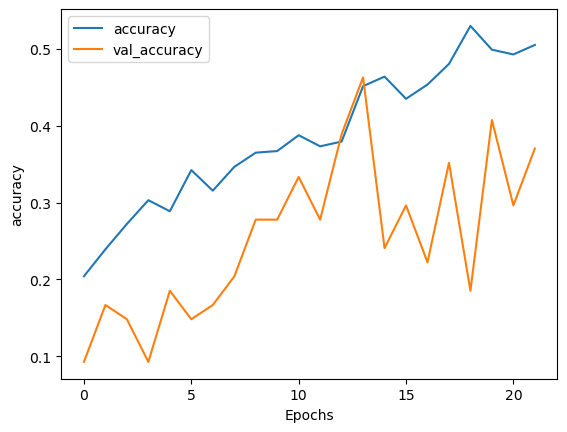

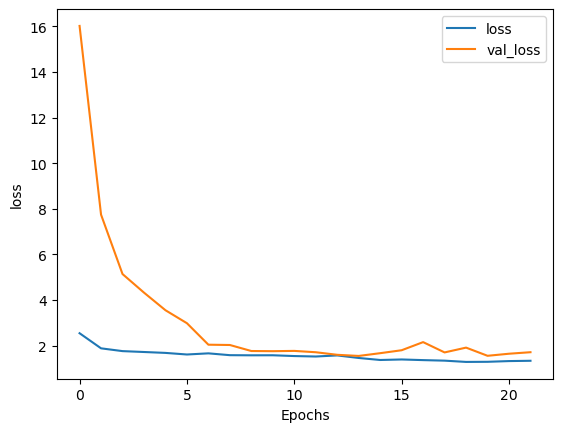

In [45]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

The data is too unstable 

In [46]:
y_true = np.array(y_test)

label_mapping = {
    0: 'nv',
    1: 'mel',
    2: 'bkl',
    3: 'bcc',
    4: 'akiec',
    5: 'vasc',
    6: 'df'
}

y_pred = model.predict(X_test)
y_pred = np.array(list(map(lambda x: np.argmax(x), y_pred)))

cm = confusion_matrix(y_true, y_pred)
clr = classification_report(y_true, y_pred, target_names=label_mapping.values())

              precision    recall  f1-score   support

           0       0.31      0.67      0.42        30
           1       0.37      0.24      0.29        29
           2       0.24      0.22      0.23        27
           3       0.31      0.59      0.40        37
           4       0.45      0.44      0.45        34
           5       0.67      0.23      0.34        44
           6       1.00      0.07      0.12        30

    accuracy                           0.35       231
   macro avg       0.48      0.35      0.32       231
weighted avg       0.49      0.35      0.33       231



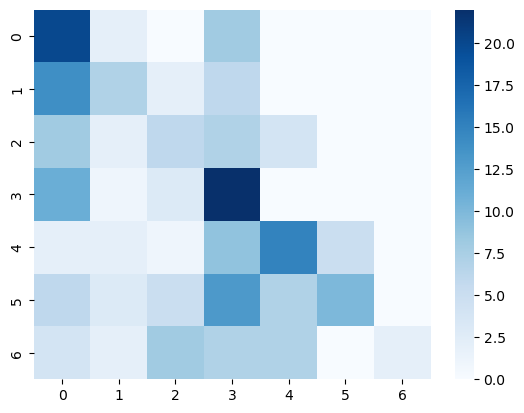

In [47]:
import seaborn as sn

y_pred = model.predict(X_test)

y_pred = np.argmax(y_pred, axis=1)
cr2 = classification_report(y_test, y_pred)
cm2 = confusion_matrix(y_test, y_pred)
sn.heatmap(cm, cmap='Blues')
print(cr2)
#print(cm) 

### The class 3, 5 and 6 are well predicted : let's take the train and augmented it to at least reach the 50 in macro avg 

In [90]:
X_train = pd.DataFrame(np.array(X_train).reshape(len(X_train), 784), columns = columns_X )
y_train = pd.DataFrame(np.array(y_train).reshape(len(y_train), 1), columns = ['label'])
new_data_train = pd.concat((X_train, y_train), axis = 1)


That's better.. Really We have our dataset 

In [91]:
data_to_replace2 = data[data['label']== 2]
data_to_replace2 = data_to_reduce2.sample(frac=0.13, replace=True, random_state=0)

data_to_replace1 = data[data['label']== 1]
data_to_replace1 = data_to_replace1.sample(frac=0.2, replace=True, random_state=0)

data_to_replace6 = data[data['label']== 6]
data_to_replace6 = data_to_replace6.sample(frac=0.091, replace=True, random_state=0)


In [92]:
new_data_train.drop( new_data_train[ new_data_train['label'] == 2 ].index, inplace=True)
new_data_train.drop( new_data_train[ new_data_train['label'] == 1 ].index, inplace=True)
new_data_train.drop( new_data_train[ new_data_train['label'] == 6 ].index, inplace=True)


In [93]:
new_data_train

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel0775,pixel0776,pixel0777,pixel0778,pixel0779,pixel0780,pixel0781,pixel0782,pixel0783,label
0,172,178,182,185,182,180,182,182,182,181,...,195,196,195,195,193,193,189,189,185,4
1,180,183,191,194,192,192,195,196,199,198,...,180,177,180,182,183,181,177,174,171,5
3,131,131,150,162,171,174,176,172,168,166,...,176,172,179,176,174,171,164,165,163,4
4,157,163,168,175,179,177,181,185,187,183,...,186,187,188,183,177,176,173,170,170,4
5,25,62,111,130,135,142,150,154,157,161,...,157,153,149,142,136,129,119,109,95,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,198,198,197,201,195,201,208,211,206,210,...,192,190,189,188,185,178,182,177,167,0
480,145,154,163,175,175,185,188,187,191,186,...,175,176,181,185,180,172,169,154,149,3
481,184,189,189,189,190,188,188,188,189,185,...,180,183,183,187,187,186,186,186,187,4
483,89,145,168,172,178,181,187,188,187,190,...,185,181,180,177,171,161,156,137,91,5


In [94]:
data_train_replaced = pd.concat((data_to_replace2, data_to_replace1, data_to_replace6,new_data_train))

In [95]:
data_train_replaced

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel0775,pixel0776,pixel0777,pixel0778,pixel0779,pixel0780,pixel0781,pixel0782,pixel0783,label
1078,155,159,161,154,152,151,155,158,160,154,...,131,129,128,128,127,126,137,126,125,2
336,161,170,175,177,178,177,180,179,181,185,...,153,147,142,140,151,149,143,143,137,2
325,156,173,181,175,172,180,184,182,189,199,...,194,198,197,190,192,185,179,165,165,2
1072,140,148,151,150,153,150,158,157,155,150,...,156,157,157,152,146,141,139,133,136,2
1072,140,148,151,150,153,150,158,157,155,150,...,156,157,157,152,146,141,139,133,136,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,198,198,197,201,195,201,208,211,206,210,...,192,190,189,188,185,178,182,177,167,0
480,145,154,163,175,175,185,188,187,191,186,...,175,176,181,185,180,172,169,154,149,3
481,184,189,189,189,190,188,188,188,189,185,...,180,183,183,187,187,186,186,186,187,4
483,89,145,168,172,178,181,187,188,187,190,...,185,181,180,177,171,161,156,137,91,5


In [97]:
data_train_replaced = data_train_replaced.reset_index()
data_train_replaced = data_train_replaced.drop('index', axis = 1)
#data_train_replaced = data_train_replaced.drop('level_0', axis = 1)

In [98]:
data_train_replaced

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel0775,pixel0776,pixel0777,pixel0778,pixel0779,pixel0780,pixel0781,pixel0782,pixel0783,label
0,155,159,161,154,152,151,155,158,160,154,...,131,129,128,128,127,126,137,126,125,2
1,161,170,175,177,178,177,180,179,181,185,...,153,147,142,140,151,149,143,143,137,2
2,156,173,181,175,172,180,184,182,189,199,...,194,198,197,190,192,185,179,165,165,2
3,140,148,151,150,153,150,158,157,155,150,...,156,157,157,152,146,141,139,133,136,2
4,140,148,151,150,153,150,158,157,155,150,...,156,157,157,152,146,141,139,133,136,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,198,198,197,201,195,201,208,211,206,210,...,192,190,189,188,185,178,182,177,167,0
503,145,154,163,175,175,185,188,187,191,186,...,175,176,181,185,180,172,169,154,149,3
504,184,189,189,189,190,188,188,188,189,185,...,180,183,183,187,187,186,186,186,187,4
505,89,145,168,172,178,181,187,188,187,190,...,185,181,180,177,171,161,156,137,91,5


In [89]:
data_train_replaced.to_csv('data\Tumeurs_train.csv')

from files.CNN import cnn

In [ ]:
print('KNN Accuracy: %.3f' % accuracy_score(y_test,log_reg_pred)) 

KNN Accuracy: 0.277
